**2do Parcial Inteligencia Artificial 1 (SIS420)**

Univ. Lino Fernando Villca Jaita (Ing. en Ciencias De La Computación)

**Temática** (lo que se quiere buscar con el dataset):  comprender el comportamiento del clientes mediante datos de este en su comportamiento al tipo de producto que elegi mediante sus datos de preferencia al realizar compras.

URL del Dataset: https://www.kaggle.com/datasets/andrewdecker/hitters-salary-adjusted-to-inflation/

Nombre: Hitters_Adjusted_Salary.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL 2024/2do Parcial/109 Hitters Salary Adjusted to inflation/Hitters_Adjusted_Salary.csv', delimiter=',')

**Aplicación de K-Means Clustering**

Fase de preprocesamiento:

In [ ]:
# Lista de columnas que no consideramos
df = df.drop(columns=['Unnamed: 0', 'playerID', 'teamID', 'lgID'])

# Mostrar las primeras filas del dataset para confirmar la eliminación de columnas
print(df.head())

   yearID   salary    ADJ Salary     GS  InnOuts   PO    A     E   DP    G  \
0    1985   545000  1.310892e+06   67.0   1698.0  314   35   4.0    1   70   
1    1985   625000  1.503317e+06   76.0   2097.0  384   48   6.0    4   96   
2    1985   800000  1.924245e+06   27.0    814.0  299   25   1.0   31  101   
3    1985   250000  6.013267e+05  124.0   3299.0  215   10   5.0    0  138   
4    1985  1500000  3.607960e+06  125.0   3196.0  917  119  11.0  111  130   

   ...   RBI   SB   CS  BB    SO  IBB  HBP   SH   SF  GIDP  
0  ...  20.0  0.0  1.0  22  12.0  1.0  1.0  4.0  2.0   8.0  
1  ...  25.0  0.0  3.0  29  25.0  1.0  1.0  0.0  4.0  15.0  
2  ...  21.0  0.0  0.0  18  22.0  4.0  0.0  0.0  1.0   5.0  
3  ...  72.0  9.0  9.0  44  76.0  4.0  3.0  1.0  2.0  13.0  
4  ...  89.0  1.0  1.0  50  57.0  4.0  1.0  0.0  6.0  18.0  

[5 rows x 26 columns]


In [ ]:
#conteo de ejemplos en cada columna
#df.count()

In [ ]:
# Manejar valores faltantes, por ejemplo, rellenando con la media de cada columna
df = df.fillna(df.mean())

# Seleccionar las características para el clustering (todas las columnas excepto 'yearID')
features = df.drop(columns=['yearID'])

In [ ]:
#ver columnas y sus tipos de cada una
df.dtypes

yearID          int64
salary          int64
ADJ Salary    float64
GS            float64
InnOuts       float64
PO              int64
A               int64
E             float64
DP              int64
G               int64
AB              int64
R               int64
H               int64
2B              int64
3B              int64
HR              int64
RBI           float64
SB            float64
CS            float64
BB              int64
SO            float64
IBB           float64
HBP           float64
SH            float64
SF            float64
GIDP          float64
dtype: object

Normalizacion de Datos

In [ ]:

# Ejemplo de escalamiento utilizando StandardScaler
from sklearn.preprocessing import StandardScaler
# Escalar las características utilizando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Ver los primeros 5 registros después del escalado
print(pd.DataFrame(X_scaled, columns=features.columns).head())

     salary  ADJ Salary        GS   InnOuts        PO         A         E  \
0 -0.467506   -0.382245 -0.219484 -0.297102  0.226080 -0.428263 -0.315010   
1 -0.445594   -0.338872 -0.034622  0.017153  0.486783 -0.323212  0.047071   
2 -0.397661   -0.243994 -1.041094 -0.993345  0.170216 -0.509071 -0.858132   
3 -0.548308   -0.542182  0.951310  0.963855 -0.142627 -0.630284 -0.133970   
4 -0.205928    0.135518  0.971851  0.882732  2.471843  0.250526  0.952273   

         DP         G        AB  ...       RBI        SB        CS        BB  \
0 -0.667157 -0.449952 -0.450665  ... -0.585947 -0.615133 -0.462736 -0.292089   
1 -0.576824  0.100455 -0.063835  ... -0.426418 -0.615133  0.155879 -0.007304   
2  0.236171  0.206302 -0.649308  ... -0.554041 -0.615133 -0.772044 -0.454823   
3 -0.697268  0.989574  1.033926  ...  1.073148  0.334137  2.011724  0.602950   
4  2.645048  0.820218  0.986879  ...  1.615544 -0.509658 -0.462736  0.847052   

         SO       IBB       HBP        SH        SF     

## K-Means

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = X_scaled

# Inicializar y ajustar el modelo KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de los clústeres
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
print(labels)

[5 5 1 ... 5 4 4]


In [41]:
# Calcular los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.0618385  -0.03985929  1.13907018  1.14164788 -0.12776474  2.21292478
   1.6539612   1.55603171  0.99480353  1.09510459  0.90581829  1.0376022
   0.92078828  0.78601809  0.19121392  0.59190246  0.6298617   0.78225073
   0.58552887  0.60667078  0.09711181  0.51360909  1.20867109  0.67277659
   0.79021801]
 [-0.34985601 -0.38163596 -1.00790052 -1.00643228 -0.55705426 -0.48763315
  -0.6091884  -0.49564272 -1.05484283 -1.06232074 -0.96464878 -1.02283063
  -0.95136337 -0.57116539 -0.72263105 -0.91637752 -0.48573395 -0.57179541
  -0.85627036 -0.90633269 -0.49442538 -0.58074073 -0.35401666 -0.74100396
  -0.83636691]
 [ 0.05604017  0.13064264  0.96049514  0.94823193  1.11425036 -0.11066672
   0.27921757  0.37572277  1.05187957  1.12035625  1.08978378  1.12473354
   1.16323927  0.21408047  1.30037829  1.37919655 -0.01280408  0.12435238
   1.07833087  1.08475515  0.87667069  0.64874484 -0.36627693  1.08066125
   1.07566161]
 [-0.11116802 -0.07580759  1.0059773   1.02583201  0.18747649 -0.406

In [42]:
silhouette_avg = silhouette_score(X, labels)
print(f"Puntuación de silueta: {silhouette_avg:.2f}")

Puntuación de silueta: 0.23


In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Aplicar K-Means con el número óptimo de clústeres
optimal_k = 6  # Este valor debe ser el número óptimo determinado por el método del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

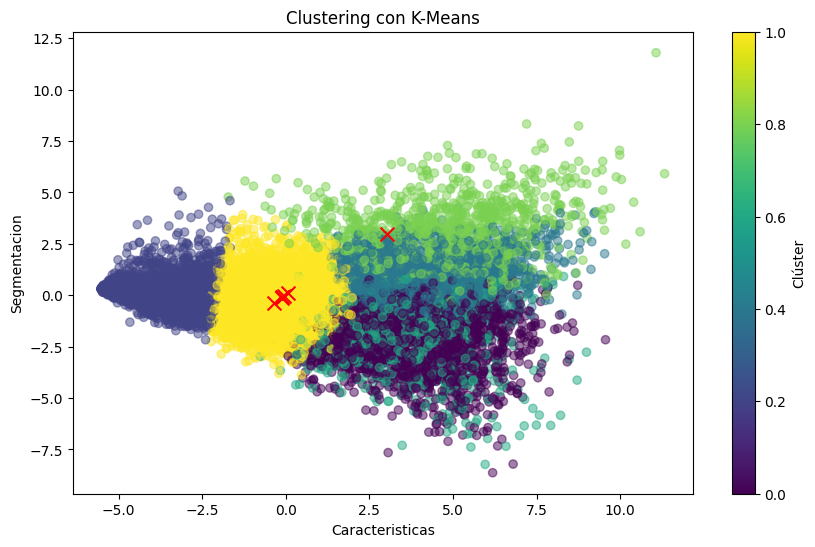

In [29]:
# Realizar la reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')
plt.title('Clustering con K-Means')
plt.xlabel('Caracteristicas')
plt.ylabel('Segmentacion')
plt.colorbar(label='Clúster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

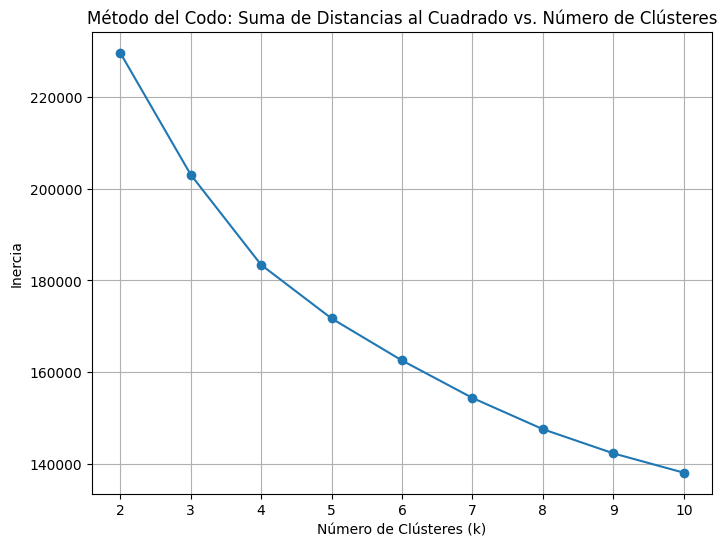

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

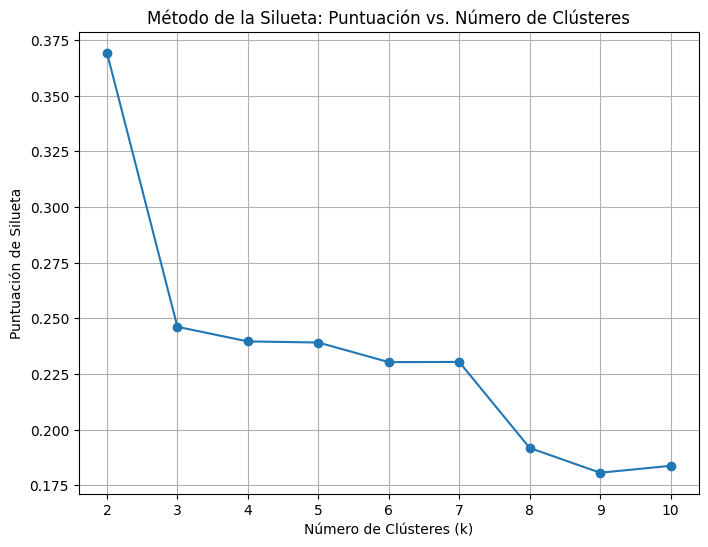

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# Elegir un rango de valores para el número de clústeres (por ejemplo, de 2 a 10)
range_clusters = range(2, 11)
inertia = []  # Lista para almacenar la suma de las distancias al cuadrado (inertia) para cada k

# Calcular la inercia para diferentes valores de k
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar la curva del codo (método del codo)
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo: Suma de Distancias al Cuadrado vs. Número de Clústeres')
plt.grid()
plt.show()

# Calcular la puntuación de silueta para diferentes valores de k
silhouette_scores = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la puntuación de silueta
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta: Puntuación vs. Número de Clústeres')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

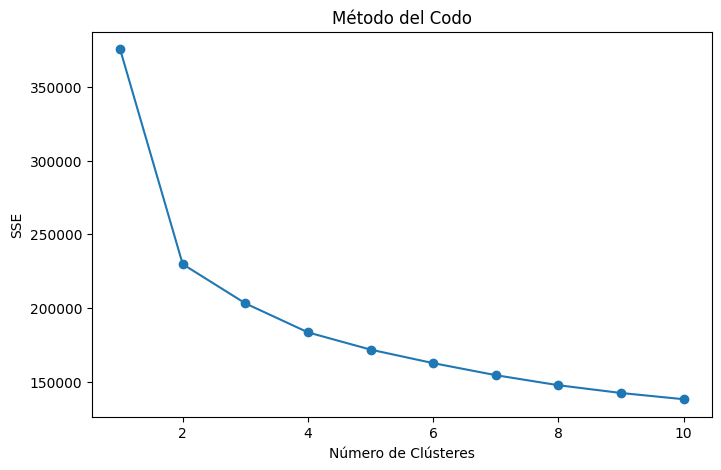

In [44]:
# Determinar el número óptimo de clústeres usando el método del codo
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()

#Aplicando con el numero de clusteres del dataset o el correcto

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


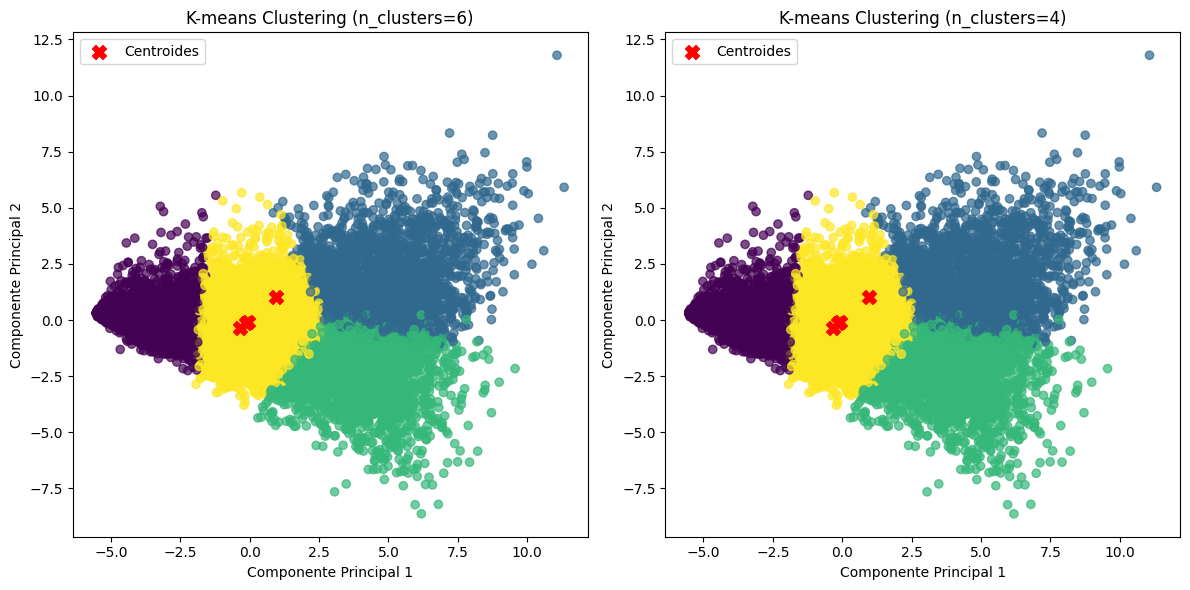

In [45]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Elegir el número de clústeres (4 en este caso)
n_clusters = 4

# Aplicar K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Asignar etiquetas de clúster a cada punto de datos
labels = kmeans.labels_

# Calcular los centroides
centroids = kmeans.cluster_centers_

# Graficar los resultados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))

# Gráfico con 6 clústeres
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'K-means Clustering (n_clusters=6)')
plt.legend()

# Gráfico con 4 clústeres
plt.subplot(1, 2, 2)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(X)
labels_4 = kmeans_4.labels_
centroids_4 = kmeans_4.cluster_centers_
X_pca_4 = pca.transform(X)
plt.scatter(X_pca_4[:, 0], X_pca_4[:, 1], c=labels_4, cmap='viridis', alpha=0.7)
plt.scatter(centroids_4[:, 0], centroids_4[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'K-means Clustering (n_clusters=4)')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
#Puntuacion cuando aplicamos el numero de clusteres correcto o mas apropiado
silhouette_avg = silhouette_score(X, labels)
print(f"Puntuación de silueta: {silhouette_avg:.2f}")

Puntuación de silueta: 0.24


### Aplicando con un 80% de datos de entrenamiento y 20% de prueba

In [48]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# número de clústeres
n_clusters = 4

# Aplicar K-means al conjunto de entrenamiento
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Evaluar el modelo en el conjunto de prueba
labels_test = kmeans.predict(X_test)

# Ahora puedes analizar los resultados y evaluar el rendimiento del modelo con los datos de prueba.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


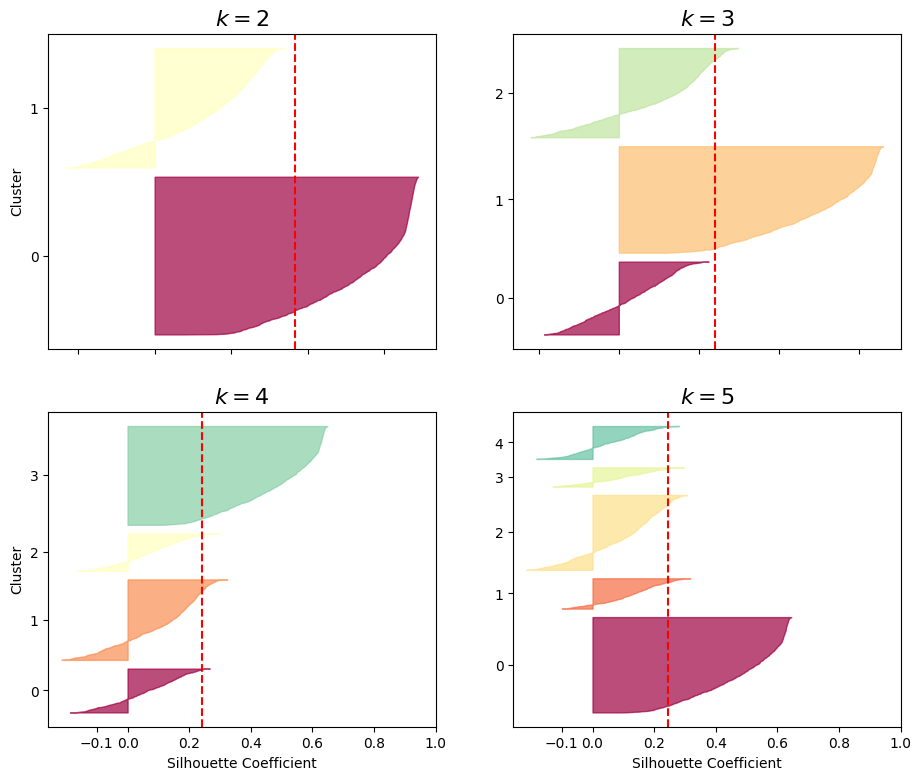

In [51]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Asumiendo que X_prueba ya está definido anteriormente como tu conjunto de datos

# Realizamos el clustering para k en el rango de 1 a 5 clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=3).fit(X_test)
                for k in range(1, 6)]  # Ajusta el rango a 5 clusters

# Lista para almacenar los scores de Silhouette
silhouette_scores = []

# Calcular el Silhouette Score para cada modelo, excluyendo k=1
for model in kmeans_per_k[1:]:
    try:
        score = silhouette_score(X_test, model.labels_)
        silhouette_scores.append(score)
    except Exception as e:
        print(f"Error al calcular el Silhouette Score para k={model.n_clusters}: {e}")
        silhouette_scores.append(float('nan'))  # Añadir un valor NaN en caso de error

# Graficar los coeficientes de Silhouette para k=2 a k=5
plt.figure(figsize=(11, 9))

for k in range(2, 6):  # Ajustar el rango a 2, 3, 4 y 5 clusters
    plt.subplot(2, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_test, y_pred)

    padding = len(X_test) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")

    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()